In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Rings')

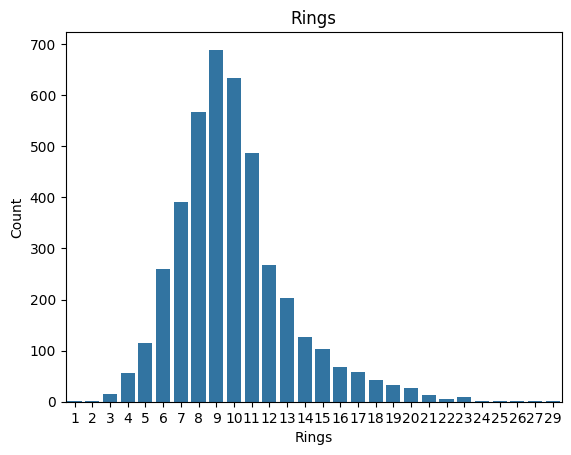

In [4]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings")

In [5]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'Rings' 컬럼에 대해 라벨 인코딩 수행
df['Rings'] = label_encoder.fit_transform(df['Rings'])

In [7]:
df['Rings'].value_counts()

Rings
8     689
9     634
7     568
10    487
6     391
11    267
5     259
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
26      2
23      2
0       1
25      1
27      1
1       1
24      1
Name: count, dtype: int64

In [8]:
df.isnull().sum()
df = df.dropna()

In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [10]:
X=df.drop('Rings',axis=1)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
id,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


In [11]:
y=df['Rings']
y.value_counts()

Rings
8     689
9     634
7     568
10    487
6     391
11    267
5     259
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
26      2
23      2
0       1
25      1
27      1
1       1
24      1
Name: count, dtype: int64

In [12]:
X = X.values
X.shape

(4177, 9)

In [13]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(y)


In [14]:
print(X.dtype)
print(Y.dtype)

object
float64


In [15]:
X=X.astype('float32')
X.dtype

dtype('float32')

In [16]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# 윈도우 크기를 설정하고, 데이터를 3차원으로 변환 (타임스텝 적용)
def create_windows(X, y, window_size):
    X_windows = []
    y_windows = []
    for i in range(len(X) - window_size):
        X_windows.append(X[i:i+window_size])  # window_size만큼의 과거 데이터를 사용
        y_windows.append(y[i+window_size])    # 그 다음 값을 예측
    return np.array(X_windows), np.array(y_windows)

window_size = 3  # 3개의 타임스텝을 사용
X, Y = create_windows(X_scaled, Y, window_size)
print (X.shape)
print (Y.shape)

(4174, 3, 9)
(4174, 28)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [19]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# CNN 모델 구성
model = Sequential()

# 1D Convolution Layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(3, 9)))  # (타임스텝=3, 특성=9)
model.add(MaxPooling1D(pool_size=1))  # pool_size를 1로 설정하면 데이터 크기 변경 없음
model.add(Dropout(0.2))

# 2번째 Convolution Layer
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.2))

# Flatten 및 Fully Connected Layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# 출력층 (분류를 위한 Dense)
num_classes = 28 
model.add(Dense(num_classes, activation='softmax'))  # softmax 활성화 함수 사용

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X, Y, epochs=30, batch_size=64, validation_split=0.1)

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30


/opt/anaconda3/envs/school/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1053 - loss: 3.2321 - val_accuracy: 0.1794 - val_loss: 2.5399
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.1592 - loss: 2.6811 - val_accuracy: 0.1890 - val_loss: 2.3481
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.1772 - loss: 2.5118 - val_accuracy: 0.2010 - val_loss: 2.3143
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.1899 - loss: 2.4733 - val_accuracy: 0.2321 - val_loss: 2.2838
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.1875 - loss: 2.4441 - val_accuracy: 0.2201 - val_loss: 2.2739
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.1952 - loss: 2.3809 - val_accuracy: 0.2105 - val_loss: 2.2394
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.2062 - loss: 2.3569 - val_accuracy: 0.2129 - val_loss: 2.2235
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.2145 - loss: 2.3321 - val_accuracy: 0.2416 - val_lo

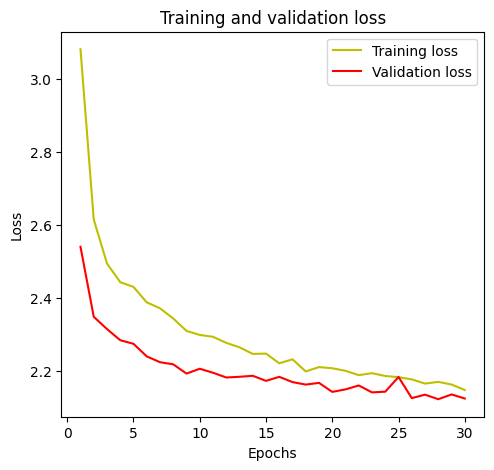

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 그래프
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


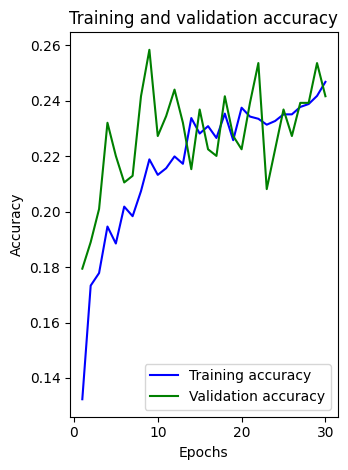

In [21]:
# 정확도 그래프
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 그래프
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # 그래프 간격 조정
plt.show()

In [22]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       0.50      0.11      0.18         9
           4       0.15      0.17      0.16        24
           5       0.34      0.23      0.28        52
           6       0.30      0.29      0.29        76
           7       0.33      0.25      0.29       111
           8       0.28      0.40      0.33       138
           9       0.19      0.40      0.26       126
          10       0.25      0.30      0.27       105
          11       0.00      0.00      0.00        44
          12       0.18      0.04      0.06        52
          13       0.33      0.03      0.06        29
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00        15
          17       0.00      0.00      0.00         1
          18       0.00    